In [ ]:
#Importing Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Loading Data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
#Data Exploration
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

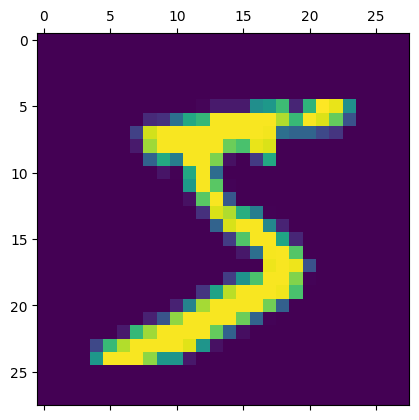

In [ ]:
plt.matshow(X_train[0])

In [ ]:
#Normalizing Data for Better Accuracy
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
#Turning Data to 1D Array for Better Processing
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_test_flattened.shape

(10000, 784)

In [ ]:
#Model Definition
model = keras.Sequential([keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')])

model.compile(optimizer  = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4726 - accuracy: 0.8758
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3042 - accuracy: 0.9150
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2837 - accuracy: 0.9210
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2731 - accuracy: 0.9233
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9251
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2617 - accuracy: 0.9265
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2584 - accuracy: 0.9277
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2553 - accuracy: 0.9288
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2528 - accuracy: 0.9300
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.25

In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2650 - accuracy: 0.9271


[0.2649659514427185, 0.9271000027656555]

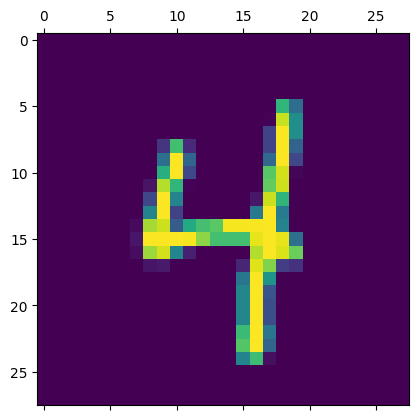

In [ ]:
plt.matshow(X_test[19])

In [ ]:
y_pred = model.predict(X_test_flattened)
y_pred[19]

313/313 [==============================] - 1s 2ms/step


array([9.03084781e-03, 5.83606598e-04, 1.53994225e-02, 5.15286177e-02,
       9.97390687e-01, 1.34674415e-01, 6.38496205e-02, 1.01215780e-01,
       8.54595155e-02, 8.71817410e-01], dtype=float32)

In [ ]:
np.argmax(y_pred[19])

4

In [ ]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
#Making a Confusion Matrix to See Both Correct and Incorrect Predicitons
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    6,    6,    3,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    5,    2,    9,    0],
       [   5,    8,  937,   14,    7,    3,   12,    9,   32,    5],
       [   3,    0,   23,  922,    0,   20,    2,   11,   17,   12],
       [   1,    1,    6,    2,  900,    0,   15,    5,    9,   43],
       [   9,    2,    3,   40,    7,  772,   17,    9,   26,    7],
       [  11,    3,   10,    1,    7,   10,  915,    1,    0,    0],
       [   1,    6,   25,    4,    3,    0,    0,  955,    2,   32],
       [   7,    8,    7,   23,    8,   20,   12,   12,  866,   11],
       [  10,    7,    1,    9,   16,    4,    0,   26,    6,  930]],
      dtype=int32)>

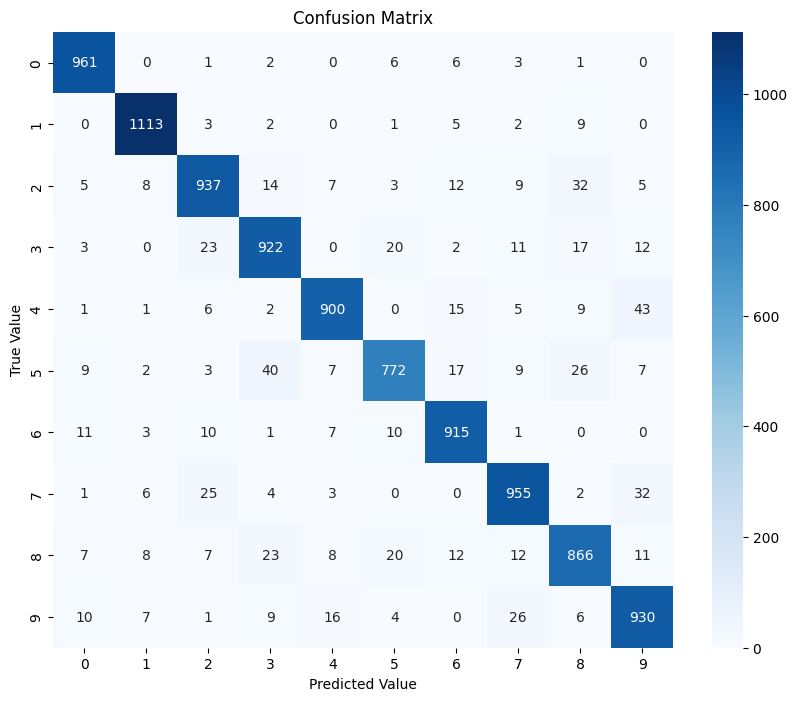

In [ ]:
#Plotting the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Adding A Hidden Layer To Improve Performance
model = keras.Sequential([keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')])

model.compile(optimizer  = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2731 - accuracy: 0.9216
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1232 - accuracy: 0.9647
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0859 - accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0647 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0513 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0416 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0340 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0279 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0226 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.019

In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.9778


[0.07989505678415298, 0.9778000116348267]

In [ ]:
#Flattening Input for Better Processing and Classification
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)),
                          keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')])

model.compile(optimizer  = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2740 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1233 - accuracy: 0.9637
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0879 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0664 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0530 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0426 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0361 - accuracy: 0.9883
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0279 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0235 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.020